In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
# Spliting train, test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
#標準化
stdsc = StandardScaler()

stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [6]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=1)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [7]:
#畫出散佈圖及決策邊界
#chose colors
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [8]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 0].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

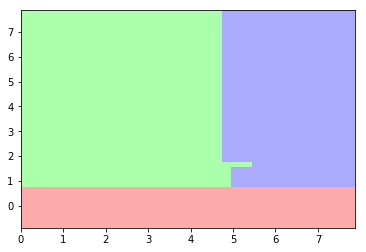

In [9]:
#依據顏色分類
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

(-0.9, 7.880000000000008)

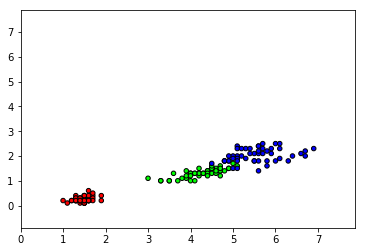

In [10]:
#畫出散佈圖
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [11]:
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [12]:
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['petal length', 'petal width'], out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree_entropy.png')

True